# House Prices

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
house_train = pd.read_csv('train_housing.csv')
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_train.shape


(1460, 81)

## Preprocessing
### Remplacement des valeurs manquantes et suppressions dont les val manquantes sont élevées.

In [4]:
house_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Traitement des valeures manquantes

In [5]:
house_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
# j'ai ma target aucune valeur nulle
y = house_train['SalePrice']


In [7]:
house_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
house_train.shape

(1460, 81)

In [9]:
house_train.loc[:,'LotFrontage']= house_train['LotFrontage'].fillna(0)

In [10]:
house_train['Alley'].isnull().sum()

1369

In [11]:
# sacahnte qu'il a 1460 observations 93% des lignes sont null autant supprimé cette colonne
house_train =  house_train.drop(['Alley'], axis=1)
#house_train.head()

In [12]:
house_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [13]:
house_train.loc[:,'MasVnrType']= house_train['MasVnrType'].fillna('None')

In [14]:
#va falloir l'encoder 
house_train['MasVnrType'] = house_train['MasVnrType'].astype('category').cat.codes
house_train['MasVnrType']

0       1
1       2
2       1
3       2
4       1
       ..
1455    2
1456    3
1457    2
1458    2
1459    2
Name: MasVnrType, Length: 1460, dtype: int8

In [15]:
house_train['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [16]:
house_train.loc[:,'MasVnrArea']= house_train['MasVnrArea'].fillna(0)

In [17]:
house_train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [18]:
house_train.loc[:,'BsmtQual']= house_train['BsmtQual'].fillna('TA')

In [19]:
house_train['BsmtQual'] = house_train['BsmtQual'].astype('category').cat.codes
house_train['BsmtQual']

0       2
1       2
2       2
3       3
4       2
       ..
1455    2
1456    2
1457    3
1458    3
1459    3
Name: BsmtQual, Length: 1460, dtype: int8

In [20]:
house_train['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [21]:
house_train.loc[:,'BsmtCond']= house_train['BsmtCond'].fillna('TA')

In [22]:
house_train['BsmtCond'] = house_train['BsmtCond'].astype('category').cat.codes
house_train['BsmtCond']

0       3
1       3
2       3
3       1
4       3
       ..
1455    3
1456    3
1457    1
1458    3
1459    3
Name: BsmtCond, Length: 1460, dtype: int8

In [23]:
house_train['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [24]:
house_train.loc[:,'BsmtFinType1']= house_train['BsmtFinType1'].fillna('Unf')

In [25]:
house_train['BsmtFinType1'] = house_train['BsmtFinType1'].astype('category').cat.codes
house_train['BsmtFinType1']

0       2
1       0
2       2
3       0
4       2
       ..
1455    5
1456    0
1457    2
1458    2
1459    1
Name: BsmtFinType1, Length: 1460, dtype: int8

In [26]:
house_train['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [27]:
house_train.loc[:,'BsmtFinType2']= house_train['BsmtFinType2'].fillna('Unf')

In [28]:
house_train['BsmtFinType2'] = house_train['BsmtFinType2'].astype('category').cat.codes
house_train['BsmtFinType2']

0       5
1       5
2       5
3       5
4       5
       ..
1455    5
1456    4
1457    5
1458    4
1459    3
Name: BsmtFinType2, Length: 1460, dtype: int8

In [29]:
house_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [30]:
house_train.loc[:,'Electrical']= house_train['Electrical'].fillna('SBrkr')

In [31]:
house_train['Electrical'] = house_train['Electrical'].astype('category').cat.codes
house_train['Electrical']

0       4
1       4
2       4
3       4
4       4
       ..
1455    4
1456    4
1457    4
1458    0
1459    4
Name: Electrical, Length: 1460, dtype: int8

In [32]:
house_train['FireplaceQu'].isnull().sum()

690

In [33]:
# ca represente presque la moitié des observations autant la supprimé
house_train =  house_train.drop(['FireplaceQu'], axis=1)
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
house_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [35]:
house_train.loc[:,'GarageType']= house_train['GarageType'].fillna('Attchd')

In [36]:
house_train['GarageType'] = house_train['GarageType'].astype('category').cat.codes
house_train['GarageType']

0       1
1       1
2       1
3       5
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: GarageType, Length: 1460, dtype: int8

In [37]:
house_train['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [38]:
house_train.loc[:,'GarageYrBlt']= house_train['GarageYrBlt'].fillna('0')

In [39]:
house_train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [40]:
house_train.loc[:,'GarageFinish']= house_train['GarageFinish'].fillna('Unf')

In [41]:
house_train['GarageFinish'] = house_train['GarageFinish'].astype('category').cat.codes
house_train['GarageFinish']

0       1
1       1
2       1
3       2
4       1
       ..
1455    1
1456    2
1457    1
1458    2
1459    0
Name: GarageFinish, Length: 1460, dtype: int8

In [42]:
house_train['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [43]:
house_train.loc[:,'GarageQual']= house_train['GarageQual'].fillna('TA ')

In [44]:
house_train['GarageQual'] = house_train['GarageQual'].astype('category').cat.codes


In [45]:
house_train['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [46]:
house_train.loc[:,'GarageCond']= house_train['GarageCond'].fillna('TA ')

In [47]:
house_train['PoolQC'].isnull().sum()

1453

In [48]:
house_train['Fence'].isnull().sum()

1179

In [49]:
house_train['MiscFeature'].isnull().sum()

1406

In [50]:
# pour les 3 derniéres il y a trop de valuers manquantes je vais les supprimé
house_train =  house_train.drop(['PoolQC','Fence', 'MiscFeature' ], axis=1)
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


Il y a plus de valeurs manquantes j'ai supprimé 5 colonnes dont les valeurs manquantes  étaient élevées.

In [51]:
house_train['MSZoning'] = house_train['MSZoning'].astype('category').cat.codes

In [52]:
house_train['Street'] = house_train['Street'].astype('category').cat.codes

In [53]:
house_train['LotShape'] = house_train['LotShape'].astype('category').cat.codes

In [54]:
house_train['LandContour'] = house_train['LandContour'].astype('category').cat.codes

In [55]:
house_train['Utilities'] = house_train['Utilities'].astype('category').cat.codes

In [56]:
house_train['LotConfig'] = house_train['LotConfig'].astype('category').cat.codes

In [57]:
house_train['BsmtExposure'] = house_train['BsmtExposure'].astype('category').cat.codes

In [58]:
house_train['Heating'] = house_train['Heating'].astype('category').cat.codes

In [59]:
house_train['HeatingQC'] = house_train['HeatingQC'].astype('category').cat.codes

In [60]:
house_train['CentralAir'] = house_train['CentralAir'].astype('category').cat.codes

In [61]:
house_train['KitchenQual'] = house_train['KitchenQual'].astype('category').cat.codes

In [62]:
house_train['Functional'] = house_train['Functional'].astype('category').cat.codes

In [63]:
house_train['GarageCond'] = house_train['GarageCond'].astype('category').cat.codes

In [64]:
house_train['PavedDrive'] = house_train['PavedDrive'].astype('category').cat.codes

In [65]:
house_train['SaleType'] = house_train['SaleType'].astype('category').cat.codes

In [66]:
house_train['SaleCondition'] = house_train['SaleCondition'].astype('category').cat.codes

In [67]:
house_train['LandSlope'] = house_train['LandSlope'].astype('category').cat.codes

In [68]:
house_train['Neighborhood'] = house_train['Neighborhood'].astype('category').cat.codes

In [69]:
house_train['Condition1'] = house_train['Condition1'].astype('category').cat.codes

In [70]:
house_train['Condition2'] = house_train['Condition2'].astype('category').cat.codes

In [71]:
house_train['BldgType'] = house_train['BldgType'].astype('category').cat.codes

In [72]:
house_train['HouseStyle'] = house_train['HouseStyle'].astype('category').cat.codes

In [73]:
house_train['RoofStyle'] = house_train['RoofStyle'].astype('category').cat.codes

In [74]:
house_train['RoofMatl'] = house_train['RoofMatl'].astype('category').cat.codes

In [75]:
house_train['Exterior1st'] = house_train['Exterior1st'].astype('category').cat.codes

In [76]:
house_train['Exterior2nd'] = house_train['Exterior2nd'].astype('category').cat.codes

In [77]:
house_train['ExterQual'] = house_train['ExterQual'].astype('category').cat.codes

In [78]:
house_train['ExterCond'] = house_train['ExterCond'].astype('category').cat.codes

In [79]:
house_train['Foundation'] = house_train['Foundation'].astype('category').cat.codes

#### Regroupement des variables

In [80]:
house_train['Condition'] = house_train['Condition1'] + house_train['Condition2'] + 1

In [81]:
house_train['StyleHouse'] = house_train['BldgType'] + house_train['HouseStyle'] + 1

In [82]:
house_train['HouseQual'] = house_train['OverallQual'] + house_train['OverallCond'] + 1

In [83]:
house_train['Roof'] = house_train['RoofStyle'] + house_train['RoofMatl'] + 1

In [84]:
house_train['Exterior'] = house_train['Exterior1st'] + house_train['Exterior1st'] + 1

In [85]:
house_train['BsmtFinType'] = house_train['BsmtFinType1'] + house_train['BsmtFinType2'] + 1

In [86]:
house_train['HeatingQual'] = house_train['Heating'] + house_train['HeatingQC'] + 1

In [87]:
house_train['FlrSF'] = house_train['1stFlrSF'] + house_train['2ndFlrSF'] + 1

In [88]:
house_train['FullBathTotal'] = house_train['BsmtFullBath'] + house_train['FullBath'] + 1

In [89]:
house_train['HalfBathTotal'] = house_train['BsmtHalfBath'] + house_train['HalfBath'] + 1

In [90]:
house_train['Bedroom'] = house_train['BedroomAbvGr'] + house_train['TotRmsAbvGrd'] + 1

In [91]:
house_train['GarageQ'] = house_train['GarageQual'] + house_train['GarageCond'] + 1

Je supprime les colonnes que j'ai fusionner en une nouvelle.

In [92]:
house_train = house_train.drop(['Condition1', 'Condition2', 'BldgType','HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','BsmtFinSF2','BsmtFinSF1', 'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','1stFlrSF', '2ndFlrSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd', 'KitchenAbvGr', 'KitchenQual', 'GarageQual','GarageCond'], axis = 1)

### Modéle de prédiction

####  Régression linéaire

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y = house_train['SalePrice']
X = house_train.drop(['SalePrice'], axis=1)

In [94]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [96]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

print ("LR train score:", train_score)
print ("LR test score:", test_score)

LR train score: 0.8739775315771667
LR test score: 0.663193586359096


#### Régression Ridge

In [97]:
from sklearn.linear_model import Ridge
# plus la valeur alpha est grande , plus il y a  de restriction sur les coefficients
# alpha faible> plus de généralisatione
# on teste d'abors sur un alpha faible
rr = Ridge(alpha=0.01) 
# restreint et dans ce cas, la régression linéaire et de ridge se ressemblent
# on teste sur un grand alpha pour faire une comparaison
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [98]:
# on commence par le petit alpha
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
print ("Ridge regression train score petit alpha:", Ridge_train_score)
print ("Ridge regression test score petit alpha:", Ridge_test_score)

Ridge regression train score petit alpha: 0.8739701445001092
Ridge regression test score petit alpha: 0.6632128168464974


In [99]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("Ridge regression train score grand alpha:", Ridge_train_score100)
print ("Ridge regression test score grand alpha:", Ridge_test_score100)

Ridge regression train score grand alpha: 0.8722618467932227
Ridge regression test score grand alpha: 0.68695221093928


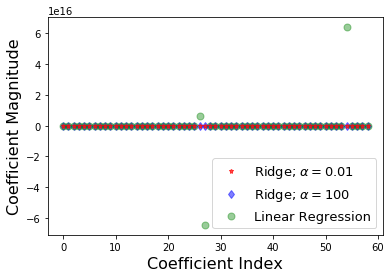

In [100]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

#### Régression Lasso

In [101]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77064036385.41724, tolerance: 719132949.9230078
  positive)


In [102]:
print ("nb de features utilisés: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

nb de features utilisés:  59


In [103]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score pour alpha=0.0001:", train_score00001)
print ("test score pour alpha =0.0001: ", test_score00001)
print ("nb de features utilisés pour alpha =0.0001:", coeff_used00001)

training score pour alpha=0.0001: 0.87397014453511
test score pour alpha =0.0001:  0.663209077475905
nb de features utilisés pour alpha =0.0001: 59


C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76890188307.44751, tolerance: 719132949.9230078
  positive)


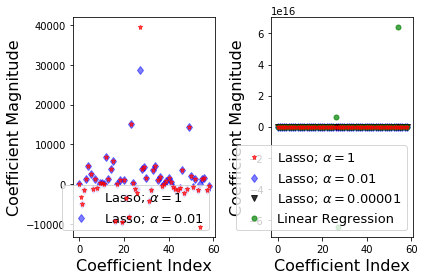

In [104]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

#### Cross Value

In [105]:
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print(scores)

[ 8.80338818e-01 -2.06707383e+21  8.95913248e-01  8.66644005e-01
  8.60763088e-01]


#### GridSearchCV

In [106]:
from sklearn.model_selection import GridSearchCV
for Model in [Ridge, Lasso]:
    #alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    alphas = range(1,1000)
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=3, ).fit(X_train, y_train)
    print('%s: %s' % (Model.__name__, gscv.best_params_))


Ridge: {'alpha': 87}


C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18673407690.633423, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56824306022.07526, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53148335454.93634, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 570471070.1259766, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577936636.2634277, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 585380578.5179443, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 701474095.6258545, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 621504625.2546387, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 708539190.4909668, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 723014986.2072754, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 811975904.394165, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 729621382.3149414, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 826346520.0632324, tolerance: 523547947.4295117
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494407409.4331665, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 916868873.838623, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979554732.4530029, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547307283.8900757, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 985693884.5618896, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 615633987.5830688, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1075224138.6983643, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619997879.0332031, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1165216318.678955, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 687529972.4604492, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1170697059.5111084, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 749960403.5654297, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1254768492.41687, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 753721979.65802, tolerance: 488481489.9027378
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876759569.2391357, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 825212936.5732422, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777747166.2827148, tolerance: 424335312.8249946
  positive)
C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

Lasso: {'alpha': 731}


In [107]:
# je teste avec alpha = 87
rr87 = Ridge(alpha=146) 
rr87.fit(X_train, y_train)

Ridge(alpha=146, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [108]:
Ridge_train_score_87 = rr87.score(X_train,y_train)
Ridge_test_score_87 = rr87.score(X_test, y_test)
print ("Ridge regression train score pour alpha = 87:", Ridge_train_score_87)
print ("Ridge regression test score pour alpha = 87:", Ridge_test_score_87)

Ridge regression train score pour alpha = 87: 0.8710462170512969
Ridge regression test score pour alpha = 87: 0.6929811603602888


Il y a une amélioration du  test score pour alpha = 87  de Ridge.

In [109]:
lasso87 = Lasso(alpha=87, max_iter=10e5)
lasso87.fit(X_train,y_train)
train_score_87=lasso87.score(X_train,y_train)
test_score_87=lasso87.score(X_test,y_test)
coeff_used_87 = np.sum(lasso87.coef_!=0)
print ("training score pour alpha = 87:", train_score_87)
print ("test score pour alpha = 87: ", test_score_87)
print ("nb de features utilisés pour alpha = 87:", coeff_used_87)

training score pour alpha = 87: 0.8738753036161105
test score pour alpha = 87:  0.6655782705128498
nb de features utilisés pour alpha = 87: 58


Pour Lasso c'est quasiment identique.

Je teste par hasard les autres modéles, les scores sont vraiment faibles. C'est pas vraiment probant j'ai bien fait de choisir en premier lieu la régression logistique . De toute façon c'est le modéle qui correspond le mieux à ce genre de dataset.
 

In [110]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)
scores = cross_val_score(svc_model, X_train, y_train, cv=5)
print(scores, "Avg accuracy : {}".format(np.mean(scores)))

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.01282051 0.02136752 0.01282051 0.01716738 0.02145923] Avg accuracy : 0.01712703129012142


In [111]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors = 5,p=1,weights="distance")
knn.fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
print(scores, "Avg accuracy : {}".format(np.mean(scores)))

[0.01709402 0.01282051 0.02564103 0.00858369 0.01287554] Avg accuracy : 0.015402956604673343


C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [112]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import  LinearRegression

classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), LinearRegression()]

for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model score: 0.003
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model s

C:\Users\ouizb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train,y_train,cv=5)
scores.mean()

-4.134147657650361e+20

In [114]:
#from sklearn.model_selection import GridSearchCV

#n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 8, 15, 25, 30]


#param_grid = dict(n_estimators = n_estimators, max_depth = max_depth)


#rf = RandomForestClassifier()

#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid)

#best_model = grid_search.fit(X_train, y_train)

#print(round(best_model.score(X_test, y_test),2))
#print(best_model.best_params_)


In [115]:
#from sklearn.metrics import classification_report
#y_pred_best = best_model.predict(X_test)
#print(classification_report(y_test, y_pred_best))

## PCA

In [116]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [117]:
house_train_quali = [[ 'MasVnrType','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','Electrical', 'GarageType','GarageFinish','GarageQual','MSZoning','Street','LotShape','LandContour','Utilities', 'LotConfig','BsmtExposure','Heating', 'HeatingQC','CentralAir' , 'KitchenQual','Functional','GarageCond','PavedDrive','SaleType','SaleCondition','Neighborhood' , 'Condition1','Condition2', 'BldgType','HouseStyle','RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation']]

In [118]:
house_train_num = house_train.drop(['MasVnrType','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','Electrical', 'GarageType','GarageFinish','GarageQual','MSZoning','Street','LotShape','LandContour','Utilities', 'LotConfig','BsmtExposure','Heating', 'HeatingQC','CentralAir' , 'KitchenQual','Functional','GarageCond','PavedDrive','SaleType','SaleCondition','Neighborhood' , 'Condition1','Condition2', 'BldgType','HouseStyle','RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation', 'SalePrice'], axis =1)

KeyError: "['BsmtFinType1' 'BsmtFinType2' 'GarageQual' 'Heating' 'HeatingQC'\n 'KitchenQual' 'GarageCond' 'Condition1' 'Condition2' 'BldgType'\n 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'] not found in axis"

In [ ]:
house_train_num_scaled = StandardScaler().fit_transform(house_train_num)


In [ ]:
y = house_train['SalePrice']
X_num = house_train_num_scaled
X = house_train.drop(['SalePrice'], axis=1)

#### Variable numériques

In [ ]:
def get_pca (array,num_components,target) :
    
    pca = PCA(n_components=num_components)
    pca_Z = pca.fit_transform(array)
    cpa_names = []
    target_df = pd.DataFrame(target)
    
    for i in range(1,num_components+1):
        cpa_names.append(f'CP{i}')
    # Scree plot :    
    principal_df = pd.DataFrame(data = pca_Z)
    figure = plt.figure(figsize=(20,15))
    df_var = pd.DataFrame({'Variance':np.cumsum(pca.explained_variance_ratio_), 'Composante principale':cpa_names})
    scree = sns.barplot(x='Composante principale',y="Variance", data=df_var, color="r")
    
    for p in scree.patches:
        scree.annotate(format(p.get_height(), '.3f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    return principal_df

principal_df = get_pca(X_num,36,y)

La premiére composante principale explique 98% de la variance

### Toutes les variables

In [ ]:
X = house_train.drop(['SalePrice'], axis=1)

In [ ]:
X2_scaled = StandardScaler().fit_transform(X)

In [ ]:
#X = house_train_scaled.drop(['SalePrice'], axis=1)

In [ ]:
def get_pca (array,num_components,target) :
    
    pca = PCA(n_components=num_components)
    pca_Z = pca.fit_transform(array)
    cpa_names = []
    target_df = pd.DataFrame(target)
    
    for i in range(1,num_components+1):
        cpa_names.append(f'CP{i}')
    # Scree plot :    
    principal_df = pd.DataFrame(data = pca_Z)
    figure = plt.figure(figsize=(20,15))
    df_var = pd.DataFrame({'Variance':np.cumsum(pca.explained_variance_ratio_), 'Composante principale':cpa_names})
    scree = sns.barplot(x='Composante principale',y="Variance", data=df_var, color="r")
    
    for p in scree.patches:
        scree.annotate(format(p.get_height(), '.3f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    return principal_df

principal_df = get_pca(X2_scaled,50,y)

https://medium.com/datadriveninvestor/a-regression-problem-with-python-house-prices-advanced-regression-techniques-98616d31f0ab